In [80]:
import numpy as np 
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc # for deleting unused variables
%matplotlib inline

import os
import warnings
warnings.filterwarnings('ignore')

In [81]:
train = pd.read_csv("train.csv")

In [82]:
test = pd.read_csv("test.csv")

In [83]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [84]:
train.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [85]:
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [86]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [87]:
train['Response_flag'] = 1
test['Response_flag'] = 0
test['Response'] = None
print(train.shape, test.shape)

df = pd.concat((train, test))
print(df.shape)

(381109, 13) (127037, 13)
(508146, 13)


In [88]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Response_flag
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,1
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,1
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,1


In [89]:
df.drop(['id','Region_Code'],axis=1,inplace=True)

In [90]:
df.columns

Index(['Gender', 'Age', 'Driving_License', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage',
       'Response', 'Response_flag'],
      dtype='object')

In [91]:
cat=df.select_dtypes(['object']).columns
cat

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage', 'Response'], dtype='object')

In [92]:
cat=cat[:-1]
cat

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

In [93]:
df=pd.get_dummies(data=df,columns=['Gender', 'Vehicle_Age', 'Vehicle_Damage'],drop_first=True)

In [94]:
df.head()

,Age,Driving_License,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Response_flag,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,44,1,0,40454.0,26.0,217,1,1,1,0,1,1
1,76,1,0,33536.0,26.0,183,0,1,1,0,0,0
2,47,1,0,38294.0,26.0,27,1,1,1,0,1,1
3,21,1,1,28619.0,152.0,203,0,1,1,1,0,0
4,29,1,1,27496.0,152.0,39,0,1,0,1,0,0


In [95]:
df.columns

Index(['Age', 'Driving_License', 'Previously_Insured', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Response_flag',
       'Gender_Male', 'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years',
       'Vehicle_Damage_Yes'],
      dtype='object')

In [96]:
train['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

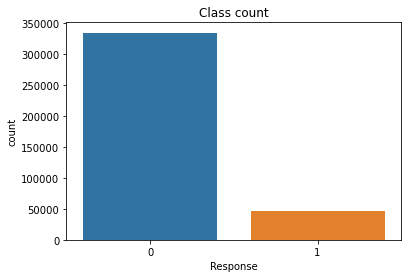

In [97]:
sns.countplot(train.Response)
plt.title("Class count")
plt.show()

In [98]:
100*(train['Response'].astype('object').value_counts()/len(train.index))

0    87.743664
1    12.256336
Name: Response, dtype: float64

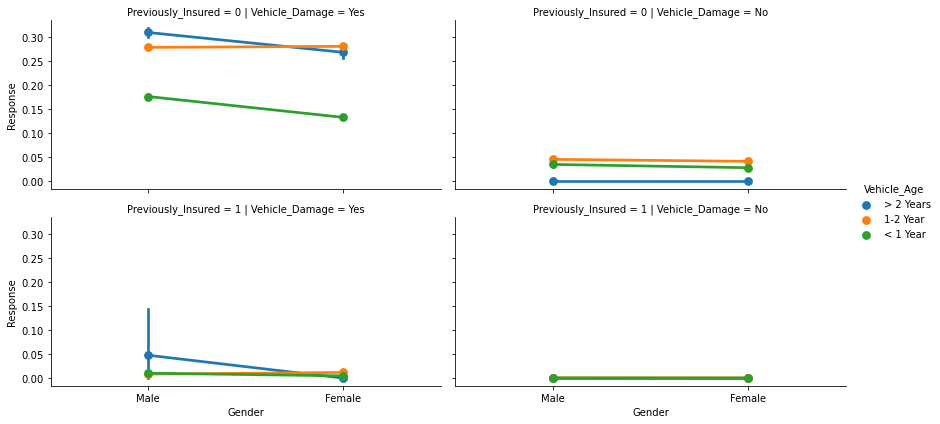

In [99]:
sns.catplot('Gender', 'Response',hue='Vehicle_Age', row = 'Previously_Insured',col='Vehicle_Damage',data=train, kind='point', height=3, aspect=2)
plt.show()

Customers who were not previously insured and their vehicle has been damaged have shown much better response, as expected

In [100]:
train,test = df[df.Response_flag == 1], df[df.Response_flag == 0]


In [101]:
print(train.shape, test.shape)

(381109, 12) (127037, 12)


In [102]:
train.drop(['Response_flag'], inplace=True, axis=1)
test.drop(['Response_flag'], inplace=True, axis=1)
test.drop(['Response'], inplace=True, axis=1)

In [103]:
print(train.shape, test.shape)

(381109, 11) (127037, 10)


In [104]:
del df

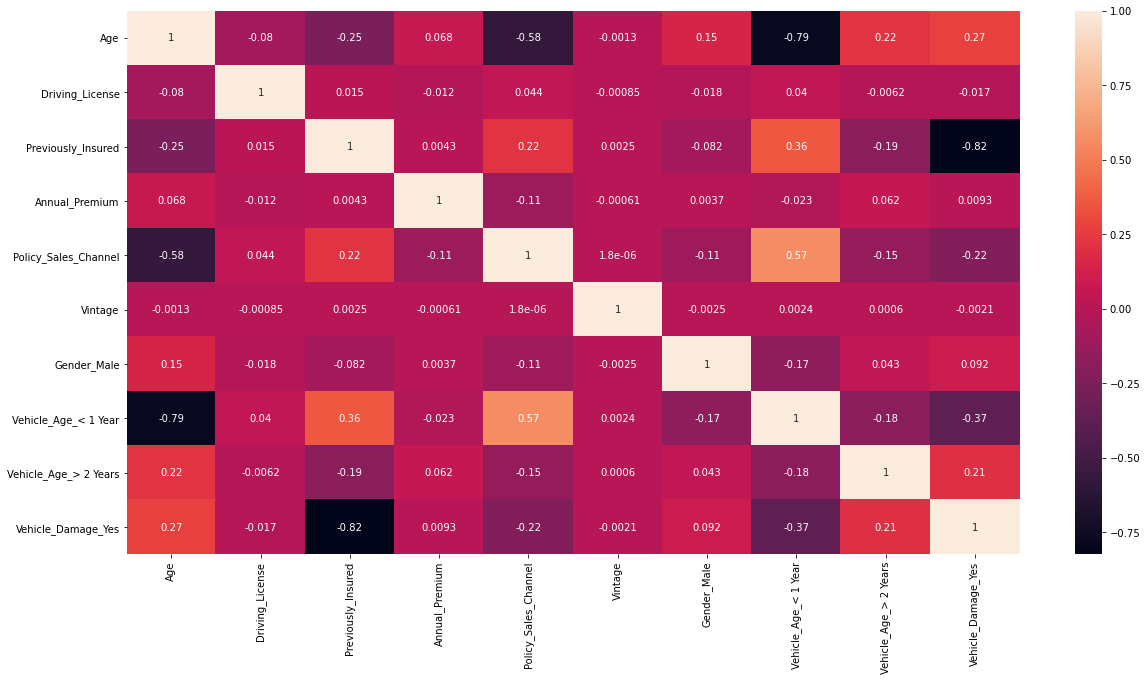

In [105]:
plt.figure(figsize = (20,10))
sns.heatmap(train.corr(),annot = True)
plt.show()

In [106]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Age                         24.0
Driving_License              0.0
Previously_Insured           1.0
Annual_Premium           14995.0
Policy_Sales_Channel       123.0
Vintage                    145.0
Gender_Male                  1.0
Vehicle_Age_< 1 Year         1.0
Vehicle_Age_> 2 Years        0.0
Vehicle_Damage_Yes           1.0
dtype: float64


In [107]:
# Checking for outliers in the continuous variables
num_train = train[['Age','Annual_Premium','Policy_Sales_Channel','Vintage']]

In [108]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_train.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Age,Annual_Premium,Policy_Sales_Channel,Vintage
count,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,30564.389581,112.034295,154.347397
std,15.511611,17213.155057,54.203995,83.671304
min,20.000000,2630.000000,1.000000,10.000000
25%,25.000000,24405.000000,29.000000,82.000000
50%,36.000000,31669.000000,133.000000,154.000000
75%,49.000000,39400.000000,152.000000,227.000000
90%,62.000000,48431.000000,156.000000,270.000000
95%,69.000000,55176.000000,160.000000,285.000000
99%,77.000000,72963.000000,160.000000,297.000000


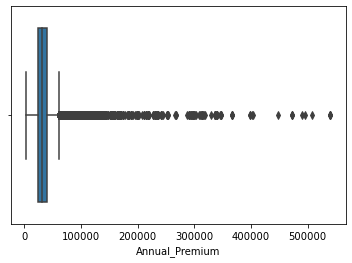

In [109]:
sns.boxplot(x=train['Annual_Premium'])

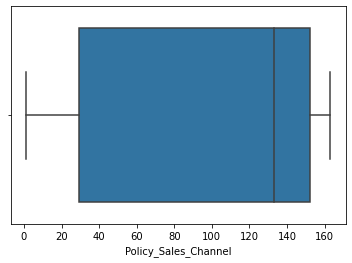

In [110]:
sns.boxplot(x=train['Policy_Sales_Channel'])

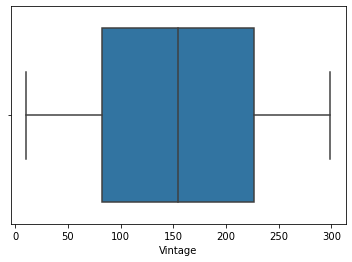

In [111]:
sns.boxplot(x=train['Vintage'])

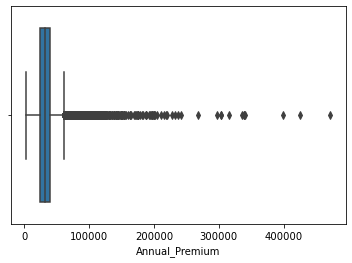

In [112]:
sns.boxplot(x=test['Annual_Premium'])

In [113]:
train.head()

,Age,Driving_License,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,44,1,0,40454.0,26.0,217,1,1,0,1,1
1,76,1,0,33536.0,26.0,183,0,1,0,0,0
2,47,1,0,38294.0,26.0,27,1,1,0,1,1
3,21,1,1,28619.0,152.0,203,0,1,1,0,0
4,29,1,1,27496.0,152.0,39,0,0,1,0,0


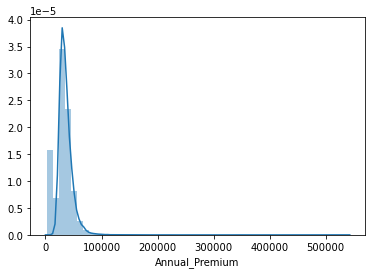

In [114]:
sns.distplot(train['Annual_Premium'])


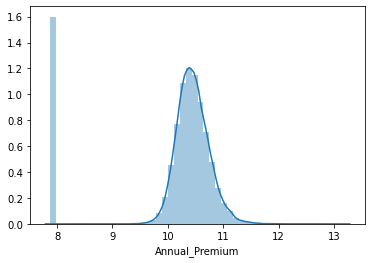

In [115]:
#Data is left Skewed as we can see from above distplot
train['Annual_Premium']=np.log(train['Annual_Premium'])
sns.distplot(train['Annual_Premium'])

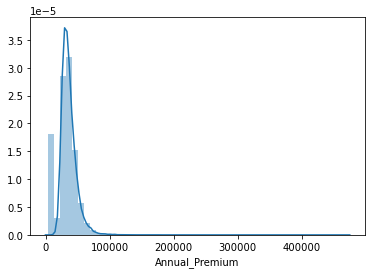

In [116]:
sns.distplot(test['Annual_Premium'])

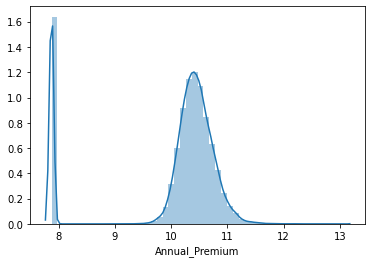

In [117]:
test['Annual_Premium']=np.log(test['Annual_Premium'])
sns.distplot(test['Annual_Premium'])

In [118]:
train.head()

,Age,Driving_License,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,44,1,0,10.607921,26.0,217,1,1,0,1,1
1,76,1,0,10.420375,26.0,183,0,1,0,0,0
2,47,1,0,10.553049,26.0,27,1,1,0,1,1
3,21,1,1,10.261826,152.0,203,0,1,1,0,0
4,29,1,1,10.221796,152.0,39,0,0,1,0,0


In [119]:
test.head()

,Age,Driving_License,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,25,1,1,10.485312,152.0,53,1,1,0,0
1,40,1,0,10.427091,7.0,111,1,0,0,1
2,47,1,0,10.597884,124.0,199,1,0,0,1
3,24,1,1,10.528249,152.0,187,1,1,0,1
4,27,1,1,10.986935,152.0,297,1,1,0,0


In [120]:
train['Response'] = train['Response'].astype(int)


In [121]:
# create x and y train
X = train.drop('Response', axis=1)
y = train[['Response']]

# split data into train and test/validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(304887, 10)
(304887, 1)
(76222, 10)
(76222, 1)


# LGBM

In [122]:
from lightgbm import LGBMClassifier

In [123]:
from sklearn.metrics import roc_auc_score

In [124]:
lg=LGBMClassifier(boosting_type='gbdt',n_estimators=500,depth=10,learning_rate=0.04,objective='binary',metric='auc',is_unbalance=True,
                 colsample_bytree=0.5,reg_lambda=2,reg_alpha=2,random_state=294,n_jobs=-1)

lg.fit(X_train,y_train)
print(roc_auc_score(y_test,lg.predict_proba(X_test)[:,1]))

0.8567032874239441


In [125]:
prob = lg.predict_proba(X_test)[:,1]

In [126]:
prob

array([0.82054691, 0.00210269, 0.72377479, ..., 0.00150833, 0.00286654,
       0.00509065])

In [127]:
import lightgbm as lgb


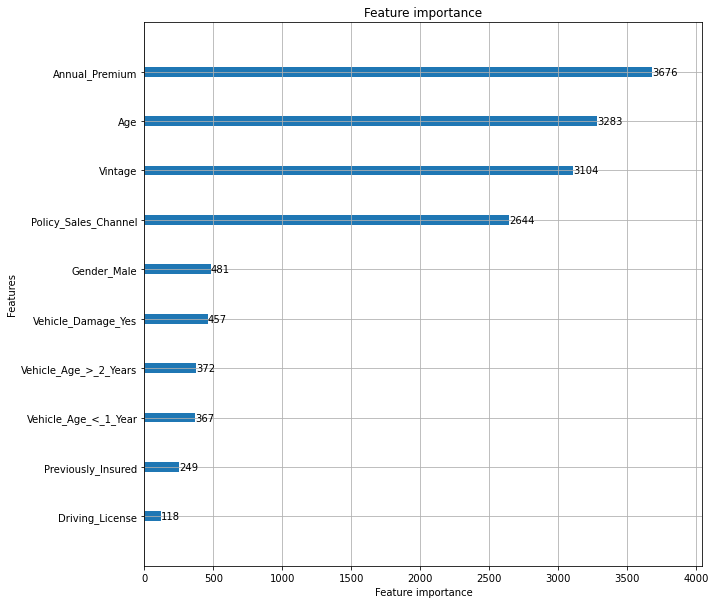

In [128]:
plt.rcParams['figure.figsize'] = (10,10)
lgb.plot_importance(lg)
plt.show()

In [129]:
test['Response']=np.array(lg.predict_proba(test)[:,1])


In [130]:
test.head()

,Age,Driving_License,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Response
0,25,1,1,10.485312,152.0,53,1,1,0,0,0.002747
1,40,1,0,10.427091,7.0,111,1,0,0,1,0.756680
2,47,1,0,10.597884,124.0,199,1,0,0,1,0.739035
3,24,1,1,10.528249,152.0,187,1,1,0,1,0.037588
4,27,1,1,10.986935,152.0,297,1,1,0,0,0.002430


In [131]:
# Getting the predicted values on the train set
y_train_pred = test['Response']
y_train_pred[:10]

0    0.002747
1    0.756680
2    0.739035
3    0.037588
4    0.002430
5    0.002039
6    0.002084
7    0.002752
8    0.751628
9    0.014798
Name: Response, dtype: float64

In [132]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00274703, 0.75667982, 0.73903505, 0.03758849, 0.00243   ,
       0.00203938, 0.00208351, 0.00275165, 0.75162832, 0.01479844])

In [133]:
test['Response'] = test.Response.map(lambda x: 1 if x > 0.5 else 0)



In [134]:
test.head()

,Age,Driving_License,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Response
0,25,1,1,10.485312,152.0,53,1,1,0,0,0
1,40,1,0,10.427091,7.0,111,1,0,0,1,1
2,47,1,0,10.597884,124.0,199,1,0,0,1,1
3,24,1,1,10.528249,152.0,187,1,1,0,1,0
4,27,1,1,10.986935,152.0,297,1,1,0,0,0


In [135]:
submission = pd.read_csv("test.csv")

In [136]:
submission.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [137]:
submit = pd.DataFrame({'id': submission.id, 'Response': test.Response})


In [138]:
submit.head()

,id,Response
0,381110,0
1,381111,1
2,381112,1
3,381113,0
4,381114,0


In [139]:
submit.to_csv('submission.csv', index=False)